## Bike Sharing Assignment

In [1]:
# Importing libraries required for assignment

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import statsmodels.api as sm

# Step1 : Reading and Understanding the Data

In [2]:
#Reading data
Bike_df = pd.read_csv("day.csv")
Bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
Bike_df.shape

(730, 16)

In [4]:
Bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


# As we can see there is no null values present in dataset,so we can proceed with present data

In [5]:
Bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:


Bike_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [7]:
#Dropping the unwanted columns
# As instant contains only index, data of dteday will be covered by yr mnth,and as Casual and registered are not features
#and casual,registered and cnt there is no need of having 3 target variable so dropping casual and registered

Bike_df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
Bike_df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


In [8]:
## Mapping all the categorical variables as per data-dictionary
Bike_df.season = Bike_df.season.map({1:'spring',2:'summer',3:'fall',4:'winter'})


In [9]:
Bike_df.mnth = Bike_df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [10]:
Bike_df.weekday = Bike_df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
Bike_df.weathersit = Bike_df.weathersit.map({1:'clear',2:'mist',3:'light snow',4:'heavy snow'})

In [11]:
Bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
Bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


# Step 2 : Visualising the Dataset

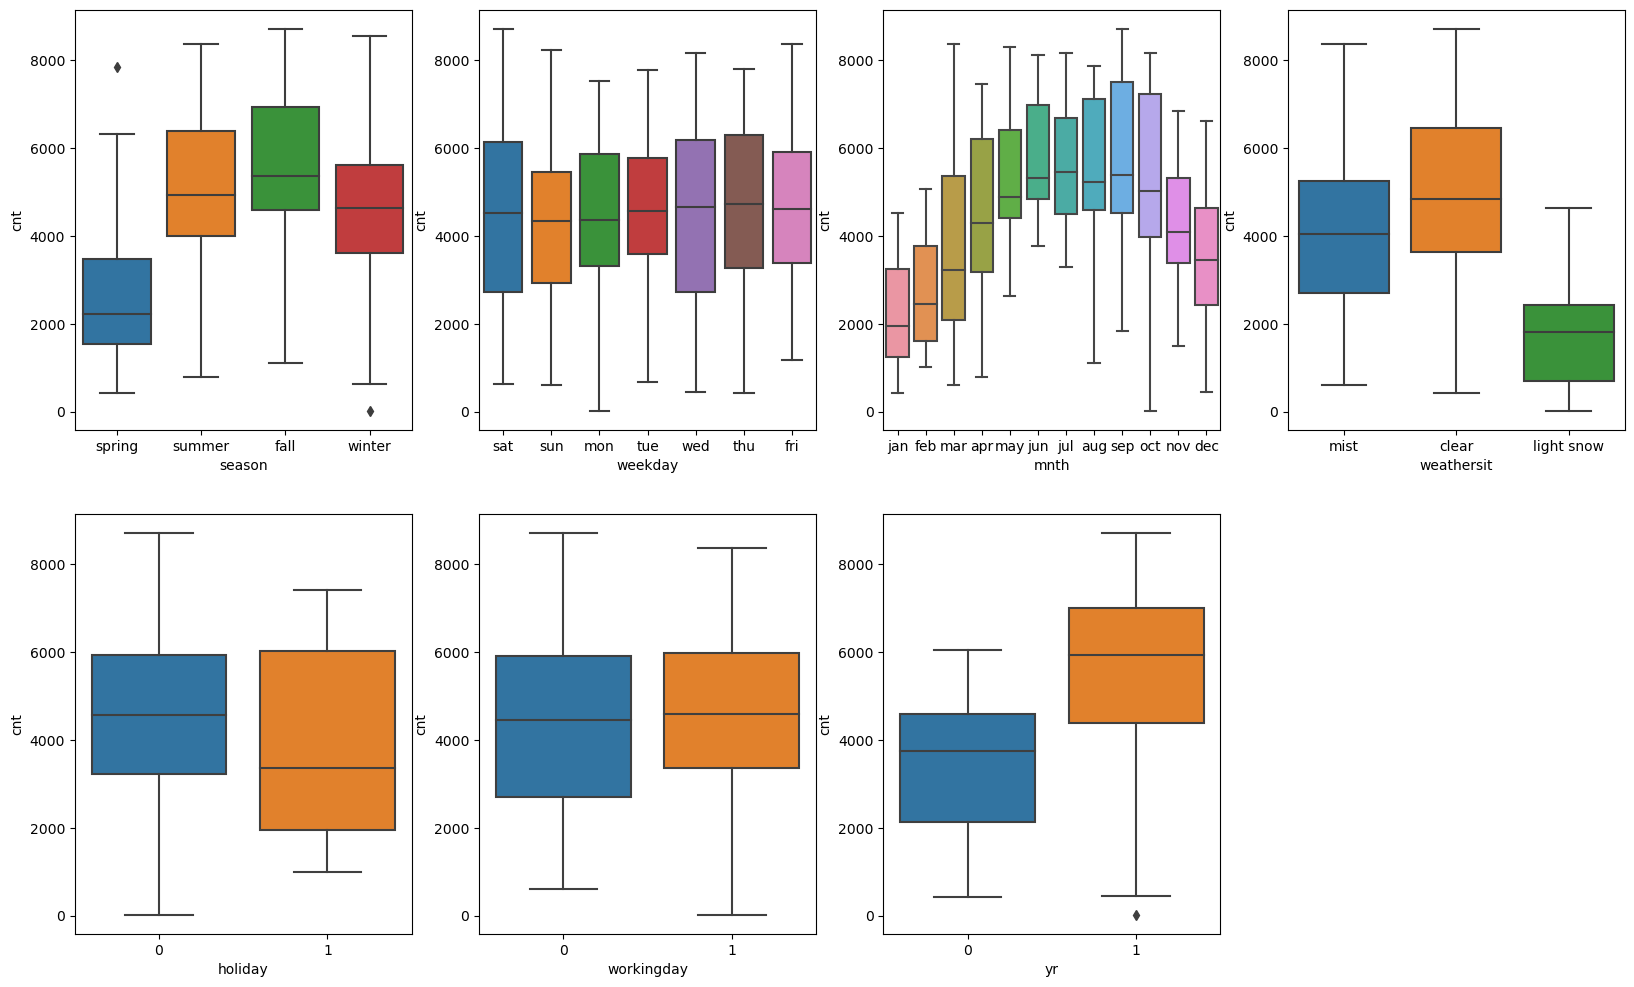

In [13]:
#Analysing and visualising the data to analyse how target variable stands in against features
## plotting categorical variable in against of target variable
plt.figure(figsize =(20,12))
plt.subplot(2,4,1)
sns.boxplot(x='season',y='cnt', data = Bike_df)
plt.subplot(2,4,2)
sns.boxplot(x='weekday',y='cnt', data = Bike_df)
plt.subplot(2,4,3)
sns.boxplot(x='mnth',y='cnt', data = Bike_df)
plt.subplot(2,4,4)
sns.boxplot(x='weathersit',y='cnt', data = Bike_df)
plt.subplot(2,4,5)
sns.boxplot(x='holiday',y='cnt', data = Bike_df)
plt.subplot(2,4,6)
sns.boxplot(x='workingday',y='cnt', data = Bike_df)
plt.subplot(2,4,7)
sns.boxplot(x='yr',y='cnt', data = Bike_df)
plt.show()

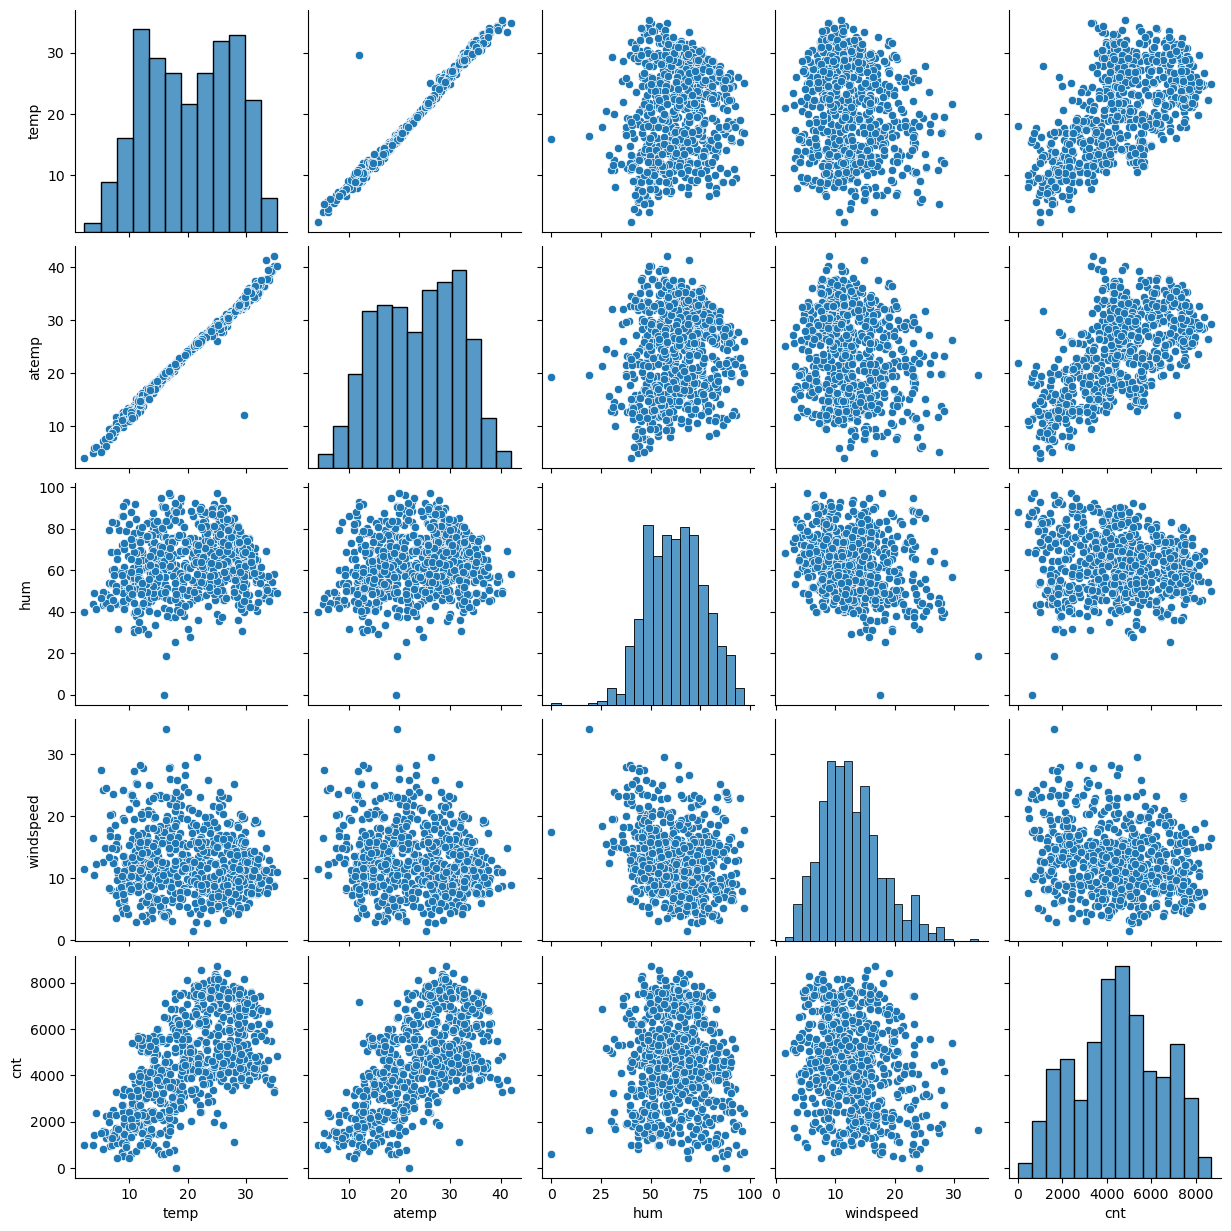

In [14]:
sns.pairplot(data = Bike_df, vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

<Axes: >

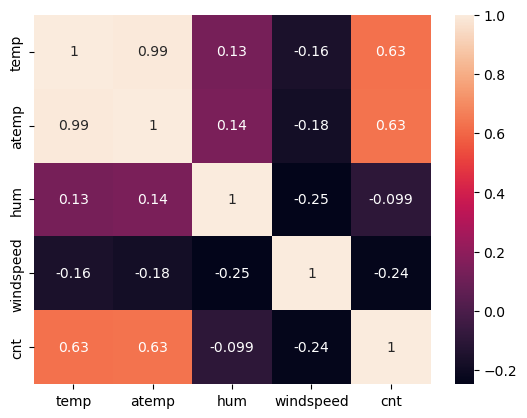

In [15]:
# Checking correlation among numeric variables
sns.heatmap(data= Bike_df[['temp','atemp','hum','windspeed','cnt']].corr(),annot = True)

## There is linear relationship between temp and atemp, Both of the features cannot be used due to multicollinearity.
## Will decide which we will remove on the basis of VIF and p-value.

# Step3 : Data Preparation

In [16]:
#Handling Categorical variable
# Creating dummy Variables for Categorical variable

Season_df = pd.get_dummies(Bike_df['season'],drop_first = True)
mnth_df = pd.get_dummies(Bike_df['mnth'],drop_first = True)
weathersit_df = pd.get_dummies(Bike_df['weathersit'],drop_first = True)
weekdays_df = pd.get_dummies(Bike_df['weekday'],drop_first = True)


In [17]:
Bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [18]:
## Concatening the dummy variables into original dataframe

Bike_df = pd.concat([Bike_df,Season_df,mnth_df,weathersit_df,weekdays_df],axis = 1)

In [19]:
Bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,oct,sep,light snow,mist,mon,sat,sun,thu,tue,wed
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,...,False,False,False,True,False,True,False,False,False,False
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,...,False,False,False,True,False,False,True,False,False,False
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,...,False,False,False,False,True,False,False,False,False,False
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,...,False,False,False,False,False,False,False,False,True,False
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,...,False,False,False,False,False,False,False,False,False,True


In [20]:
Bike_df.replace({True: 1, False: 0}, inplace=True)
Bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,oct,sep,light snow,mist,mon,sat,sun,thu,tue,wed
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,...,0,0,0,1,0,1,0,0,0,0
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,1,0,0,0
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,1,0
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,1


In [21]:
## Dropping Categorical Variable out of which we have created Dummy Variable, as it is no longer needed
Bike_df = Bike_df.drop(['season','mnth','weathersit','weekday'],axis = 1)
Bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,light snow,mist,mon,sat,sun,thu,tue,wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


In [22]:
Bike_df.shape

(730, 30)

In [23]:
Bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   spring      730 non-null    int64  
 9   summer      730 non-null    int64  
 10  winter      730 non-null    int64  
 11  aug         730 non-null    int64  
 12  dec         730 non-null    int64  
 13  feb         730 non-null    int64  
 14  jan         730 non-null    int64  
 15  jul         730 non-null    int64  
 16  jun         730 non-null    int64  
 17  mar         730 non-null    int64  
 18  may         730 non-null    int64  
 19  nov         730 non-null    i

# Step 4 :Splitting The data into Train and Test sets

In [24]:
df_train,df_test = train_test_split(Bike_df,train_size = 0.7,random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


## As we can see except cnt all numeric columns has very small values, So we are using Min-Max Scaling 

In [25]:
scaler = MinMaxScaler()
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,light snow,mist,mon,sat,sun,thu,tue,wed
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,1,0,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,1,0,0,0,0,0,0


In [26]:
# dividing datasets into X and y to train model 
y_train = df_train.pop('cnt')
X_train = df_train

## this time we are using Linear Regression function as it is compatible with RFE approach

# Building the model using RFE Approach

In [27]:
# create a linear regression model using RFE approach
lm = LinearRegression()
lm.fit(X_train,y_train)
# As we have 30 features, while creating model we are starting with 15 features
rfe = RFE(lm, step = 15)
rfe = rfe.fit(X_train,y_train)

In [28]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('aug', False, 2),
 ('dec', False, 2),
 ('feb', False, 2),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 2),
 ('mar', False, 2),
 ('may', False, 2),
 ('nov', False, 2),
 ('oct', False, 2),
 ('sep', False, 2),
 ('light snow', True, 1),
 ('mist', True, 1),
 ('mon', False, 2),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 2),
 ('tue', False, 2),
 ('wed', False, 2)]

In [29]:
# Printing columns which RFE selected and which RFE does not selected to build model
RFE_selected_cols = X_train.columns[rfe.support_]
print('Features selected by RFE:',RFE_selected_cols)
RFE_not_selected_cols = X_train.columns[~rfe.support_]
print('Features not selected by RFE:',RFE_not_selected_cols)

Features selected by RFE: Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'winter', 'jan', 'jul', 'light snow', 'mist', 'sat', 'sun'],
      dtype='object')
Features not selected by RFE: Index(['atemp', 'summer', 'aug', 'dec', 'feb', 'jun', 'mar', 'may', 'nov',
       'oct', 'sep', 'mon', 'thu', 'tue', 'wed'],
      dtype='object')


# Step 5 :Building model using statsmodel, for the detailed statstics

In [30]:
# Creating a template function for building the model
#X_train = Independent features
#y_train = Target variable
# return = model created using the inputs


def build_Linear_reg_model_and_stats(X_train,y_train):

    # Adding a constant variable
    X_train_sm = sm.add_constant(X_train)
    # Running the linear model
    lm = sm.OLS(y_train,X_train_sm).fit()
    print(lm.summary())
    
    
    #Calculate the VIFs for the model
    vif = pd.DataFrame()
    vif['features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by = "VIF", ascending =  False)
    print('\n---------')
    print(vif)
    print('\n---------')
    return(lm)


## Creating first model

In [31]:
X_train_rfe = X_train[RFE_selected_cols]
#creating a model after removing workingday feature
Linear_Model_1 = build_Linear_reg_model_and_stats(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     200.1
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          1.12e-187
Time:                        21:22:51   Log-Likelihood:                 505.97
No. Observations:                 510   AIC:                            -983.9
Df Residuals:                     496   BIC:                            -924.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2484      0.026      9.655      0.0

## Inference :
### All p-values seems to be good as they are below 0.05 except holiday
### R-squared value :0.840
### Adjusted. R-squared value = 0.840 
### VIF values are high for workingday,sat,sun which are above 5
### So, here we will drop one by one value

## Creating second model

In [32]:
#firstly we will drop high VIF feature, so wrokingday 
X_train = X_train_rfe.drop(['workingday'],axis=1)
#creating a model after removing workingday feature
Linear_Model_2 = build_Linear_reg_model_and_stats(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     200.1
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          1.12e-187
Time:                        21:22:51   Log-Likelihood:                 505.97
No. Observations:                 510   AIC:                            -983.9
Df Residuals:                     496   BIC:                            -924.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3429      0.032     10.875      0.0

## Inference :

### R-squared :0.840
### Adjusted. R-squared :0.836
### It didnot dropped much that means we haven't removed any important feature
### p-values looks good except sat
### VIF values are high hum and temp, so we will drop hum feature

## Step 3 : Creating third Model

In [33]:
# we will drop high VIF feature, so hum 
X_train = X_train_rfe.drop(['workingday','hum'],axis=1)
#creating a model after removing workingday feature
Linear_Model_3 = build_Linear_reg_model_and_stats(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.7
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          4.05e-186
Time:                        21:22:52   Log-Likelihood:                 499.48
No. Observations:                 510   AIC:                            -973.0
Df Residuals:                     497   BIC:                            -917.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2711      0.025     11.021      0.0

## Inference :

### R-squared :0.836
### Adjusted. R-squared :0.832
### It didnot dropped much that means we haven't removed any important feature
### p-values looks good except sat
### VIF values looks good as all are below 5
### since p-value is high for sat, as these are greater than 0.05,so we will drop sat

## Creating fourth model

In [34]:
#firstly we will drop high VIF feature, so hum 
X_train = X_train_rfe.drop(['workingday','hum','sat'],axis=1)
#creating a model after removing workingday feature
Linear_Model_4 = build_Linear_reg_model_and_stats(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.7
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          4.48e-187
Time:                        21:22:52   Log-Likelihood:                 498.92
No. Observations:                 510   AIC:                            -973.8
Df Residuals:                     498   BIC:                            -923.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2733      0.025     11.149      0.0

## Inference :

### R-squared :0.835
### Adjusted. R-squared :0.832
### It didnot dropped much that means we haven't removed any important feature
### p-values looks good for all features now as all are below 0.05
### VIF values looks good as all are below 5
### As Linear_Model_4 have very low multicollinearity between the predictors and p-values, so all features seems to be significant.

### F-statstics 229.7 is greater than 1, prob(f-statstics) is approximately equal to 0,states that model is significant and we can proceed ahead with this model

In [35]:
# Checking the parameters and their coefficients of final model
Linear_Model_4.params

const         0.273314
yr            0.234318
holiday      -0.099177
temp          0.448376
windspeed    -0.155915
spring       -0.103586
winter        0.042301
jan          -0.042376
jul          -0.078775
light snow   -0.286810
mist         -0.079090
sun          -0.048906
dtype: float64

# Step 6 :Residual Analysis of the Train data and Validation

In [36]:
X_train

,yr,holiday,temp,windspeed,spring,winter,jan,jul,light snow,mist,sun
576,1,0,0.815169,0.264686,0,0,0,1,0,0,0
426,1,0,0.442393,0.255342,1,0,0,0,0,1,0
728,1,0,0.245101,0.663106,1,0,0,0,0,0,1
482,1,0,0.395666,0.188475,0,0,0,0,0,1,0
111,0,0,0.345824,0.380981,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,0.863973,0.187140,0,0,0,0,0,0,0
53,0,0,0.202618,0.111379,1,0,0,0,0,0,0
350,0,0,0.248216,0.431816,0,1,0,0,0,1,0
79,0,0,0.462664,0.529881,0,0,0,0,0,1,0


### So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), now plotting  the histogram of the error terms.

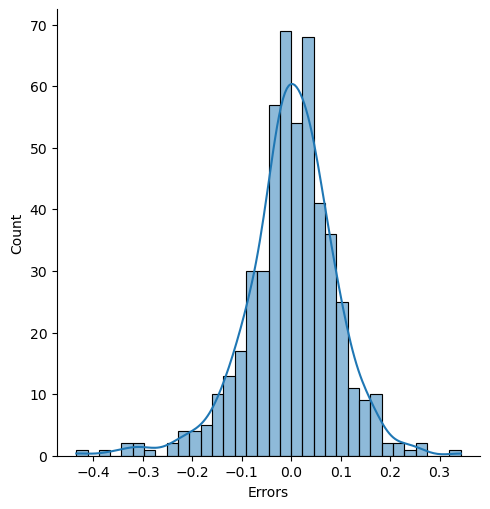

In [37]:
# Predict the output based on the final model
X_train = sm.add_constant(X_train)
y_train_pred = Linear_Model_4.predict(X_train)

# Calculate the residual error
res_error = y_train-y_train_pred
# Plot the residual error
sns.displot(res_error, kde=True)
# X-label
plt.xlabel('Errors')
plt.show()


### By seeing the plot, we can see error is normally distributed 

# Step 7: Multicollinearity

In [38]:
X_train = X_train.drop(['const'],axis=1)
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending =  False)
vif

,features,VIF
2,temp,4.28
3,windspeed,3.97
4,spring,2.25
0,yr,2.06
6,jan,1.60
9,mist,1.53
5,winter,1.41
7,jul,1.31
10,sun,1.18
8,light snow,1.08


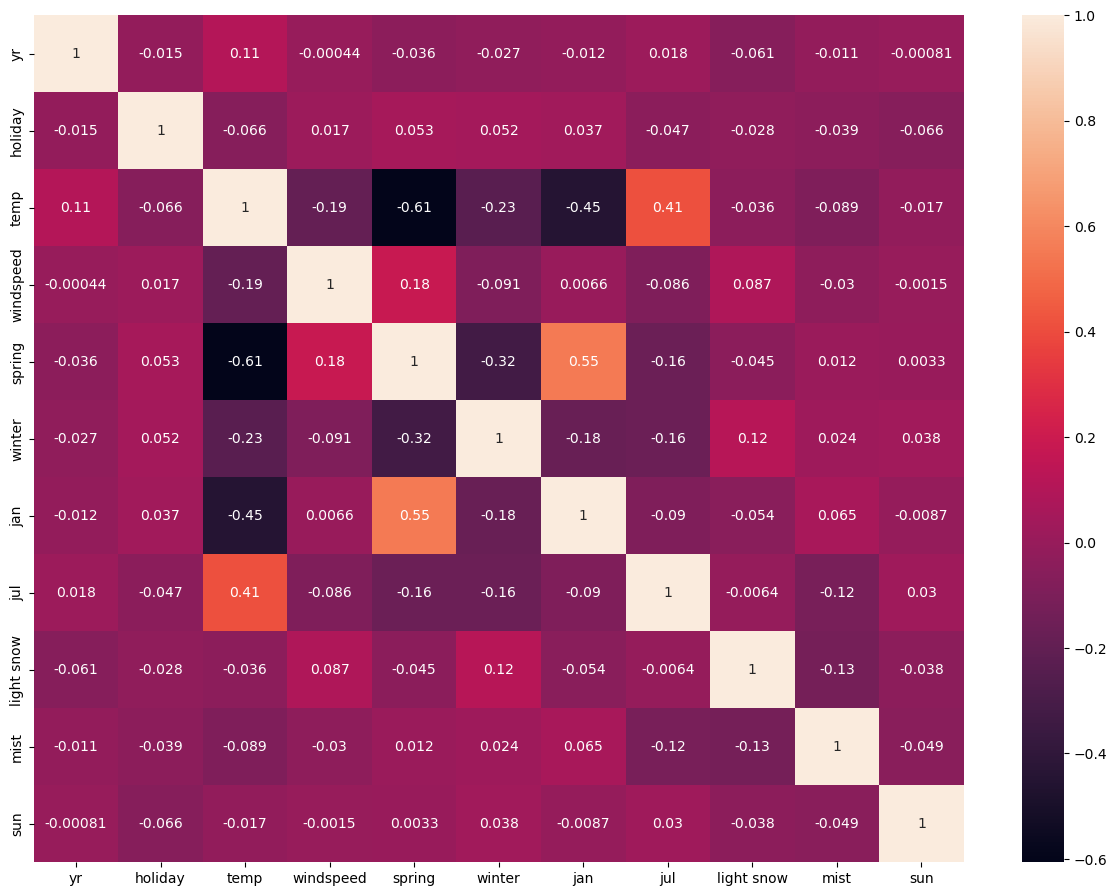

In [39]:
plt.figure(figsize=(15,11))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

## VIF is less than 5, and there are no as such multicollinearity is seen in the map

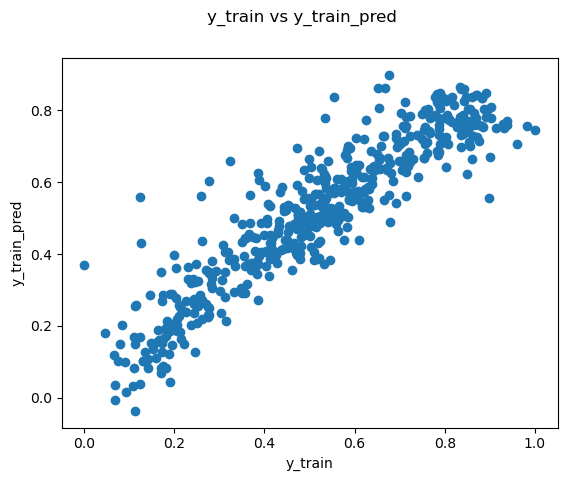

R2 score for test data:  0.8353624700417608


In [40]:
# Plotting y_train and y_train_pred to understand the spread
plt.scatter(y_train, y_train_pred)
plt.suptitle('y_train vs y_train_pred')
plt.xlabel('y_train')
plt.ylabel('y_train_pred')
plt.show()

# Find out the R squared value between test and predicted test data sets.
print("R2 score for test data: ", r2_score(y_true=y_train, y_pred=y_train_pred))

### R2 score is fairly high 

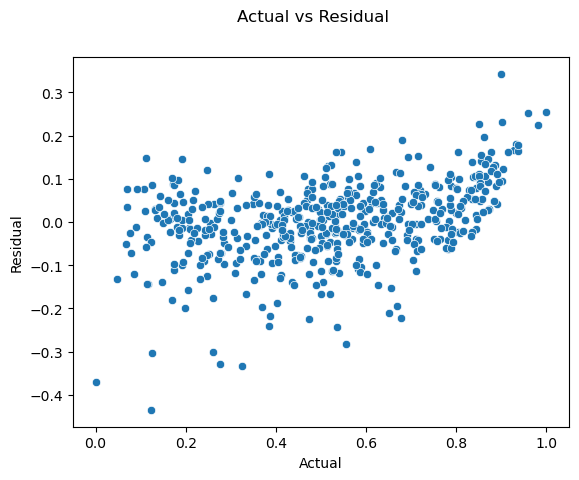

In [41]:
# Look if the error term is having any pattern with target variable
sns.scatterplot(x=y_train, y=res_error)
plt.suptitle('Actual vs Residual')
plt.xlabel('Actual')
plt.ylabel('Residual')
plt.show()

## From above plotting we can see there is no auto correlation

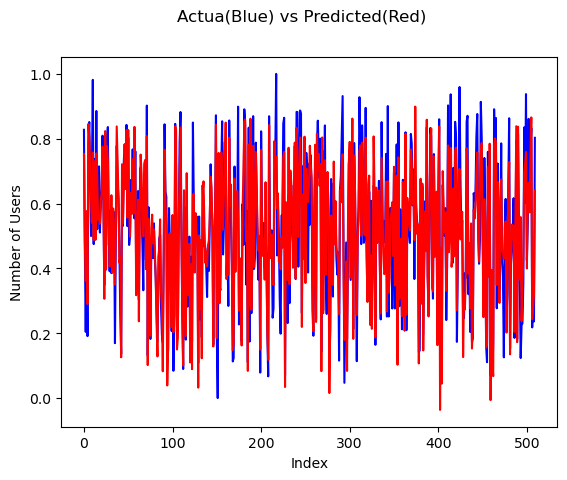

In [42]:
# Look how closely the actual and predicted values are
index = [i for i in range(0,len(X_train),1)]
plt.plot(index,y_train, color="blue")
plt.plot(index,y_train_pred, color="red")
plt.suptitle('Actua(Blue) vs Predicted(Red)')
plt.xlabel('Index')
plt.ylabel('Number of Users')
plt.show()

## From above we can see actual and predict values are so close, hence it can be said that model is best fit model

# Step 8 : Making Prediction for test data using Trained model

# Apply scaler() to all the columns except categorical variables which are 0/1 columns

In [43]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,light snow,mist,mon,sat,sun,thu,tue,wed
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,1,1,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,0,0,1
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,1,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,0,0,1,0,0


In [44]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,light snow,mist,mon,sat,sun,thu,tue,wed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.027273,0.318182,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.163248,0.466833,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
# Load the test data into independant and dependant variable
y_test = df_test.pop('cnt')

In [46]:
X_test = df_test

In [47]:
Cols = X_train.columns
# Select only the best predictors in test data set
X_test = X_test[Cols]

#adding constant to test dataframe
X_train = sm.add_constant(X_test)

In [48]:
y_pred = Linear_Model_4.predict(X_train)

In [49]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.804

# Step 9 :Model Evaluation

Text(0, 0.5, 'y_pred')

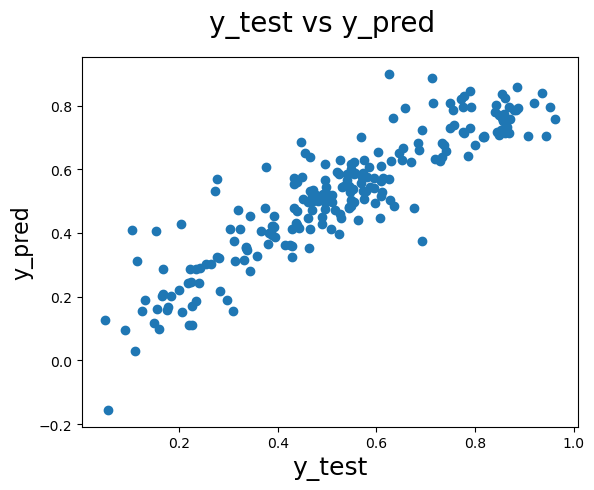

In [52]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [53]:
round(Linear_Model_4.params,4)

const         0.2733
yr            0.2343
holiday      -0.0992
temp          0.4484
windspeed    -0.1559
spring       -0.1036
winter        0.0423
jan          -0.0424
jul          -0.0788
light snow   -0.2868
mist         -0.0791
sun          -0.0489
dtype: float64

In [54]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7937


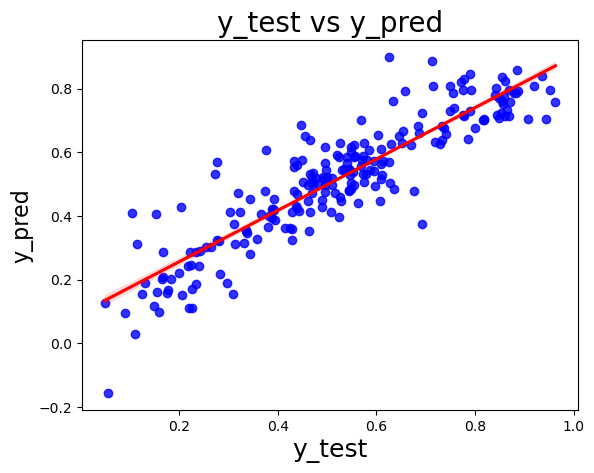

In [55]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

# Comparision between Training and Testing dataset:
    - Train dataset R^2          : 0.833
    - Test dataset R^2           : 0.8038
    - Train dataset Adjusted R^2 : 0.829    
    - Test dataset Adjusted R^2  : 0.7944

## Demand of bikes depend on yr, holiday, temp, windspeed Light_snow, Misty, spring,jan,jul,sun and winter.